Цель и результат:

В этом домашнем задании вам предстоит провести первичный анализ данных (EDA) и познакомиться с достаточно небольшим, но интересным датасетом по раку груди. Признаками в этом наборе данных являются различные измерения образований в груди, такие как радиус, симметричность, и т.д. Целевой переменной является диагноз - является ли новообразование злокачественным или нет.
Пошаговая инструкция:
1. Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
2. Посмотрите на базовые статистики датасета, средние, медианы, и т.д.
3. Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы
4. Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?
5. Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?
6. Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных

Также очень приветствуется ваша инициатива по визуализациям и исследовании данных


Критерий оценивания:
Загрузка данных и базовые статистики - 2 балла
Распределения переменных - 2 балла
Корреляции и scatterplot-ы - 3 балла
Boxplot-ы - 3 балла
Итого 10 из 10

In [110]:
import pandas as pd
import numpy as np

import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


# 1

In [111]:
data = pd.read_csv('breast_cancer-55755-0eb698.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 2

In [112]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [113]:
data.iloc[:, :16].describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000


In [114]:
data.iloc[:, 16:].describe()


,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [115]:
data['Unnamed: 32'].value_counts()


Series([], Name: Unnamed: 32, dtype: int64)

In [116]:
data['Unnamed: 32'].nunique()

0

In [117]:
# 'Unnamed: 32' - это пустой столбец, удалим его для удобства:
data = data.drop(['Unnamed: 32'], axis = 1)
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [118]:
data["diagnosis"].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

# 3

In [119]:
name_columns = list(data.columns)
name_columns.remove('id')
name_columns.remove('diagnosis')
len(name_columns)


30

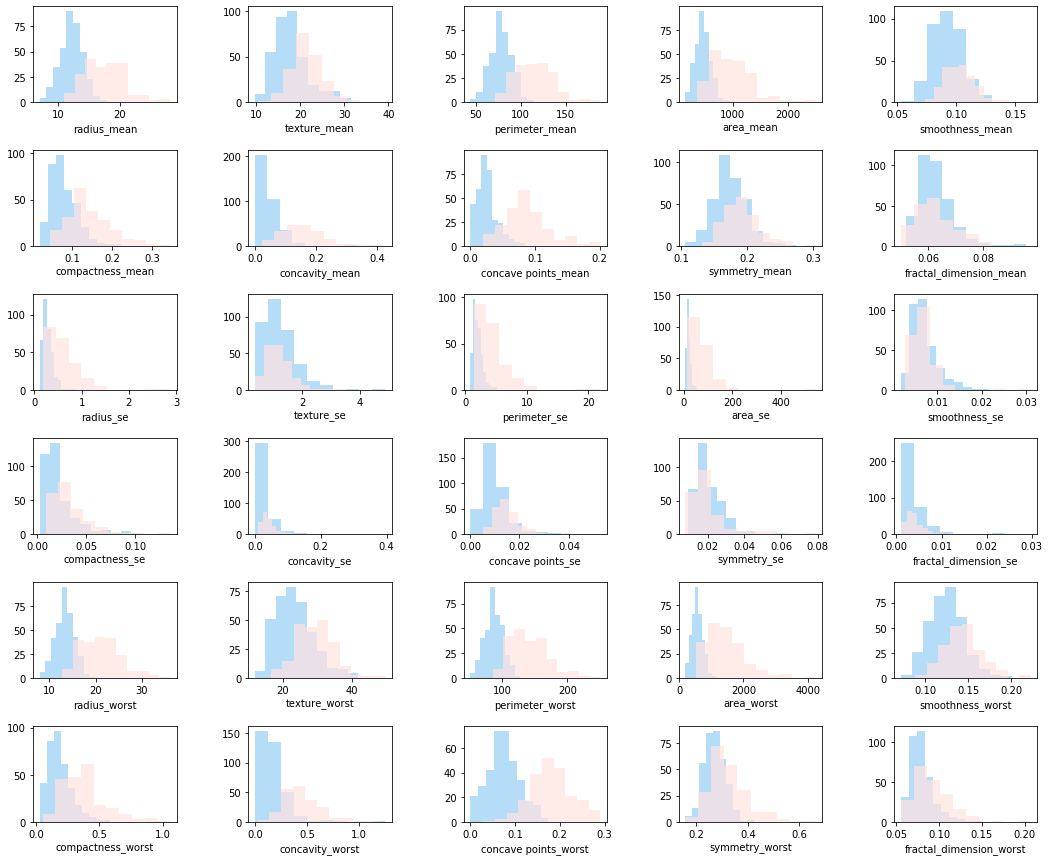

In [120]:
fig, axes = plt.subplots(nrows = 6, ncols = 5, figsize = (18, 15))

for idx, feat in enumerate(name_columns):
    axes[idx // 5, idx % 5].hist(data[data['diagnosis'] == 'B'][feat], color='#98cff4', alpha=0.7)
    axes[idx // 5, idx % 5].hist(data[data['diagnosis'] == 'M'][feat], color='#ffe4e1', alpha=0.7)
    axes[idx // 5, idx % 5].set_xlabel(feat)
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)


# 4

In [121]:
Corr = data.corr()


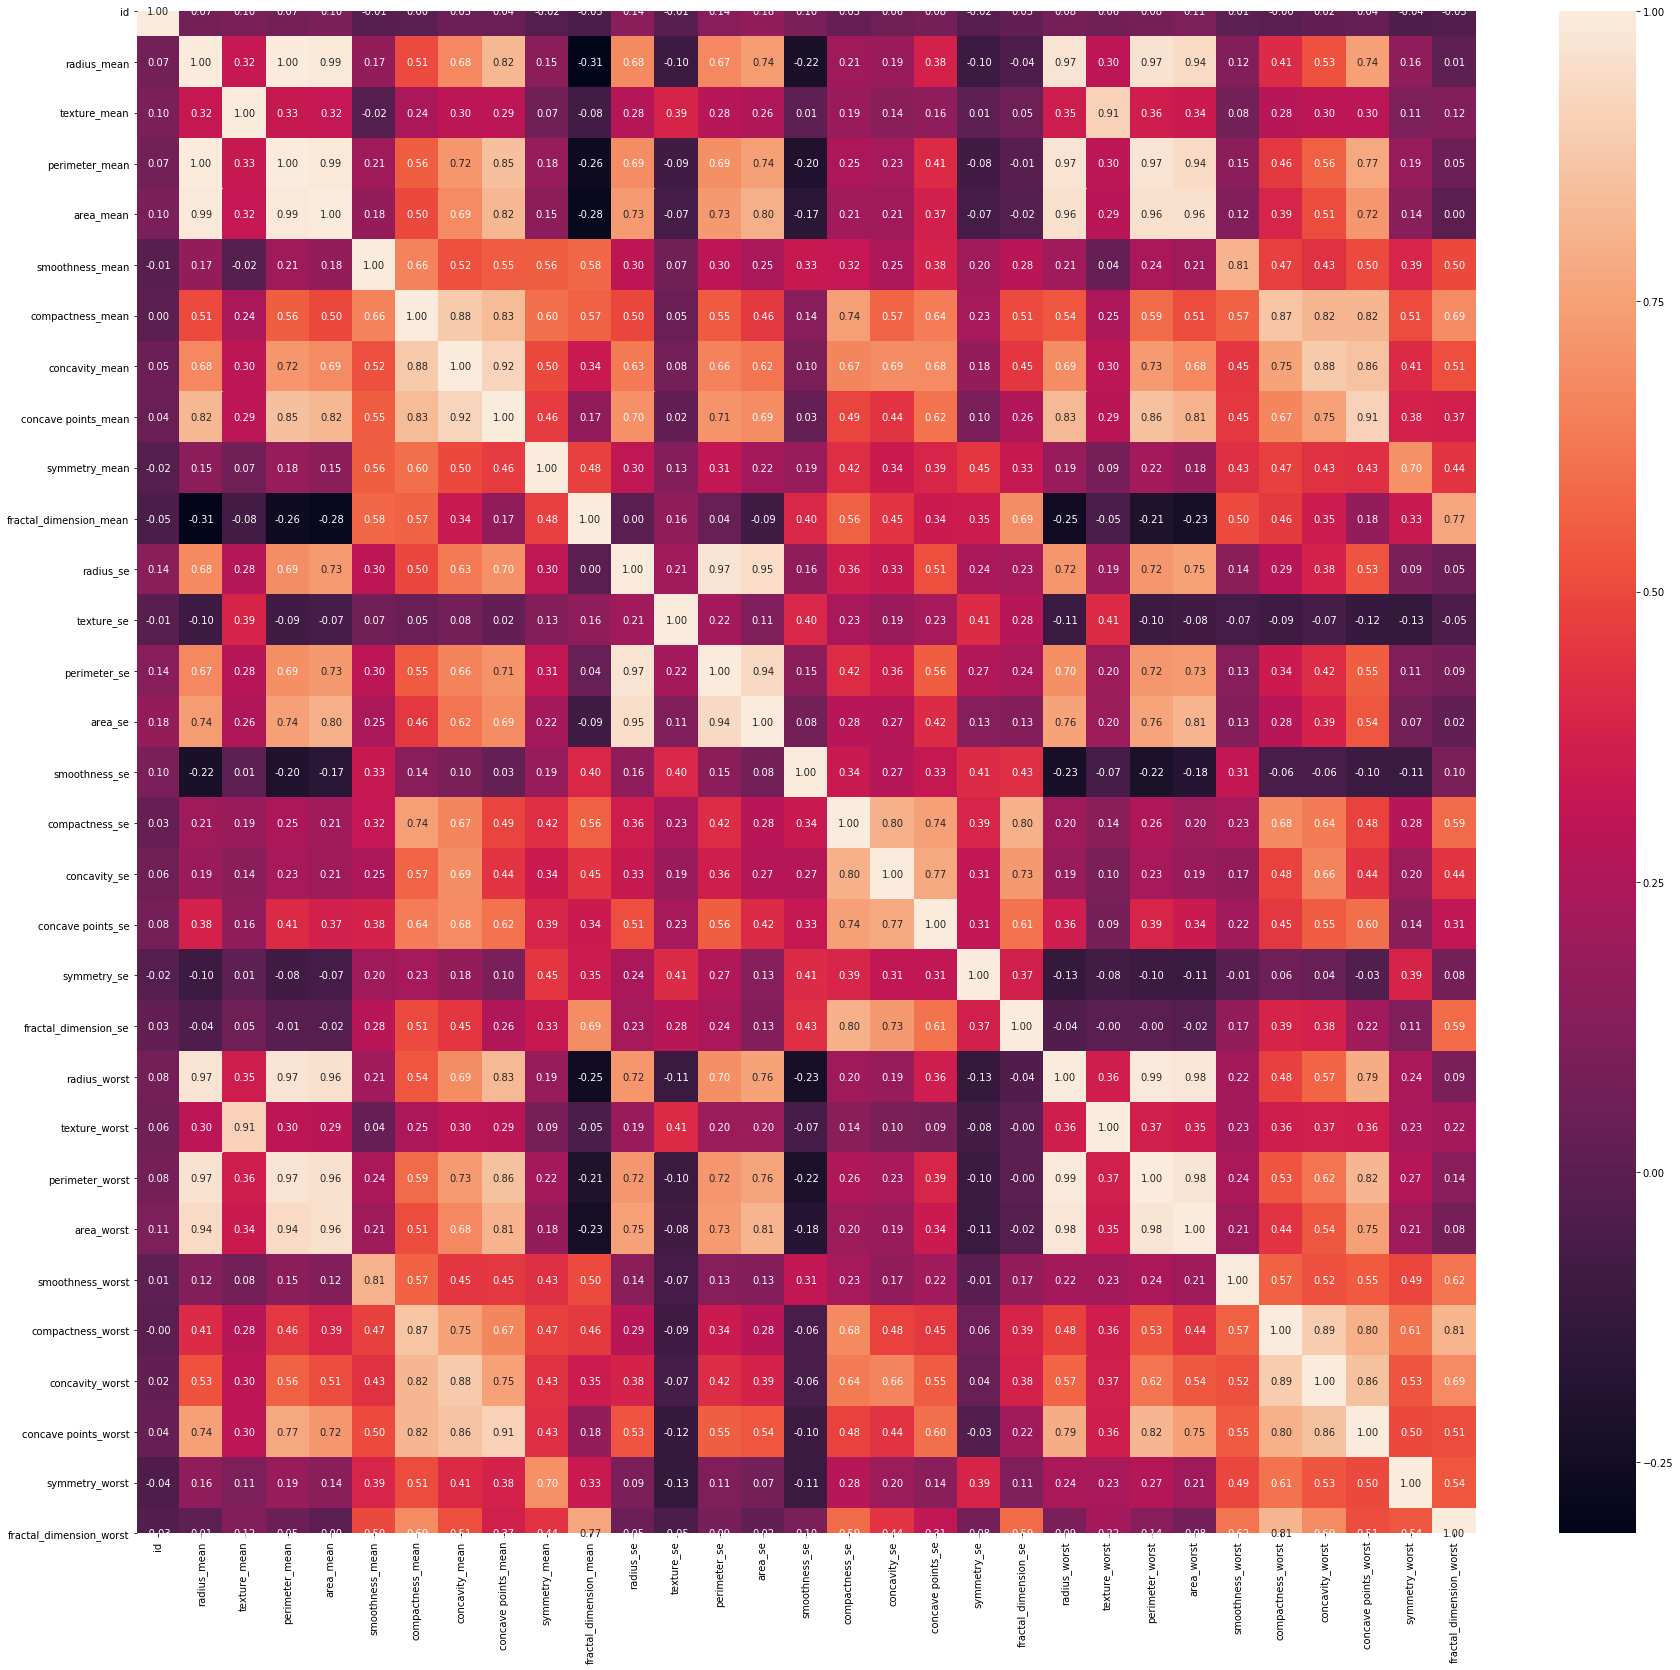

In [122]:
plt.figure(figsize = (30, 28))
sns.heatmap(Corr, annot = True, fmt = '.2f');


In [123]:
# На heatmap встречаются очень высокие значения корреляции. 
# Будем считать сильной корреляцией значения более 0,8. Найдем их:

CorField = []
CorPairs = []

for i in Corr:
    for j in Corr.index[Corr[i] > 0.8]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            CorPairs.append([i, j, Corr[i][Corr.index == j].values[0]])
            print (i, '-->', j, ': R =', Corr[i][Corr.index == j].values[0])


radius_mean --> perimeter_mean : R = 0.9978552814938113
radius_mean --> area_mean : R = 0.9873571700566119
radius_mean --> concave points_mean : R = 0.8225285223871791
radius_mean --> radius_worst : R = 0.9695389726112053
radius_mean --> perimeter_worst : R = 0.9651365139559878
radius_mean --> area_worst : R = 0.9410824595860459
texture_mean --> texture_worst : R = 0.9120445888404215
smoothness_mean --> smoothness_worst : R = 0.8053241954943631
compactness_mean --> concavity_mean : R = 0.8831206701772499
compactness_mean --> compactness_worst : R = 0.8658090398022638
compactness_mean --> concavity_worst : R = 0.8162752498000281
compactness_mean --> concave points_worst : R = 0.8155732235690654
radius_se --> perimeter_se : R = 0.9727936770160752
radius_se --> area_se : R = 0.95183011211099
compactness_se --> concavity_se : R = 0.8012683427383301
compactness_se --> fractal_dimension_se : R = 0.8032688176617685


# 5

CPU times: user 24.5 s, sys: 273 ms, total: 24.8 s
Wall time: 24.8 s


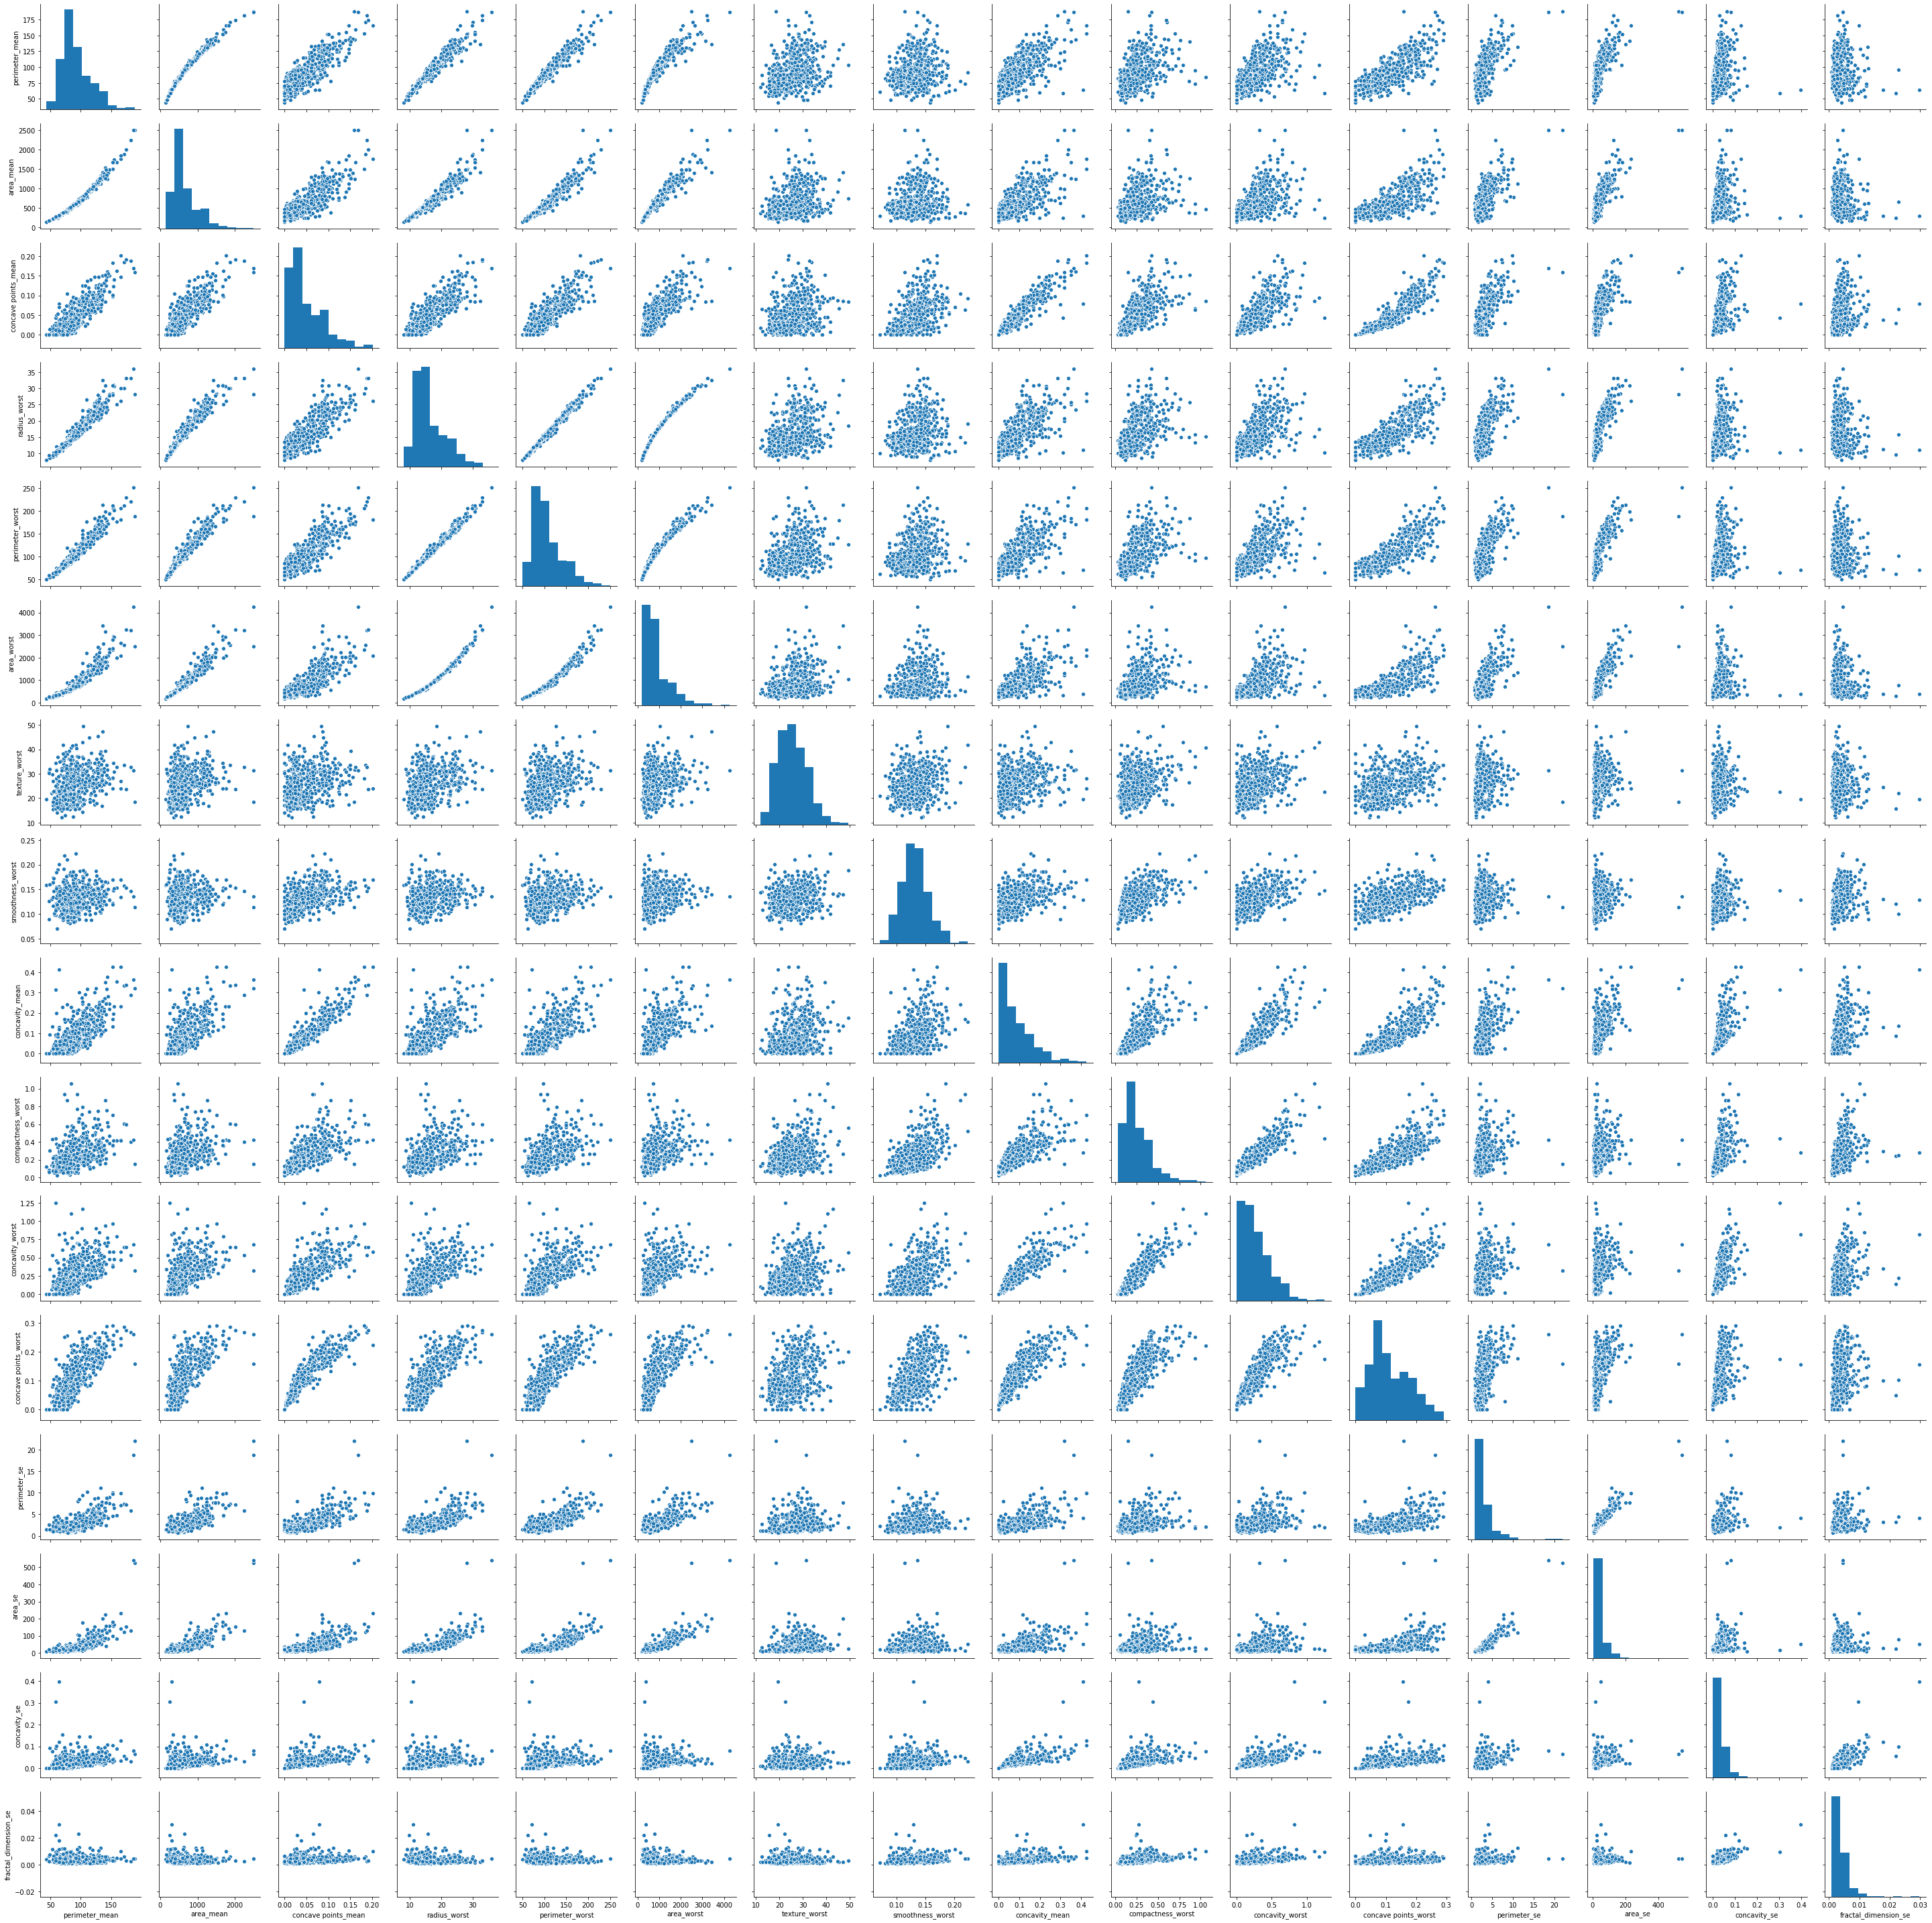

In [124]:
%%time

# Построим графики парных корреляций через pairplot:
sns.pairplot(data[CorField]);


In [125]:
len(CorPairs)


16

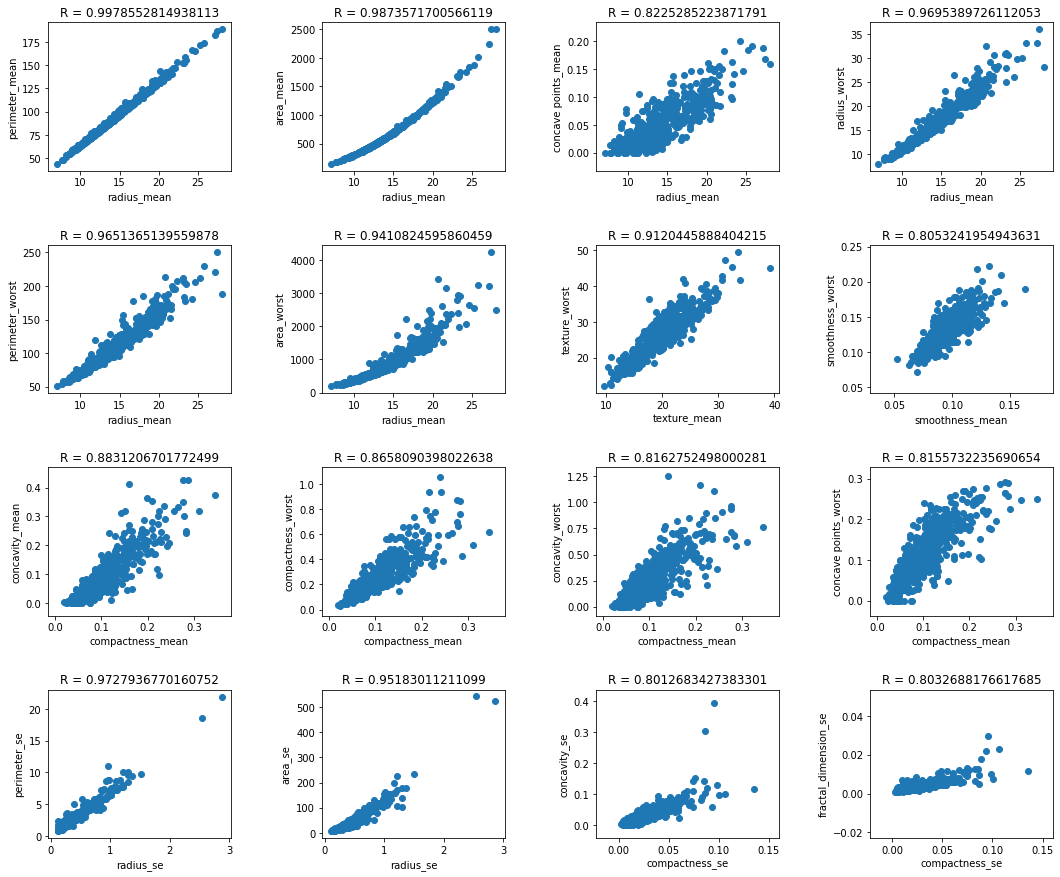

In [126]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 15))

for idx, feat in enumerate(CorPairs):
#     sns.regplot(x = feat[0], y = feat[1], data = data, ax = axes[idx // 4, idx % 4])
    
    axes[idx // 4, idx % 4].scatter(x = feat[0], y = feat[1], data = data)
    axes[idx // 4, idx % 4].set_title('R = %s' % str(feat[2]))
    axes[idx // 4, idx % 4].set_xlabel(feat[0])
    axes[idx // 4, idx % 4].set_ylabel(feat[1])
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    
plt.show()

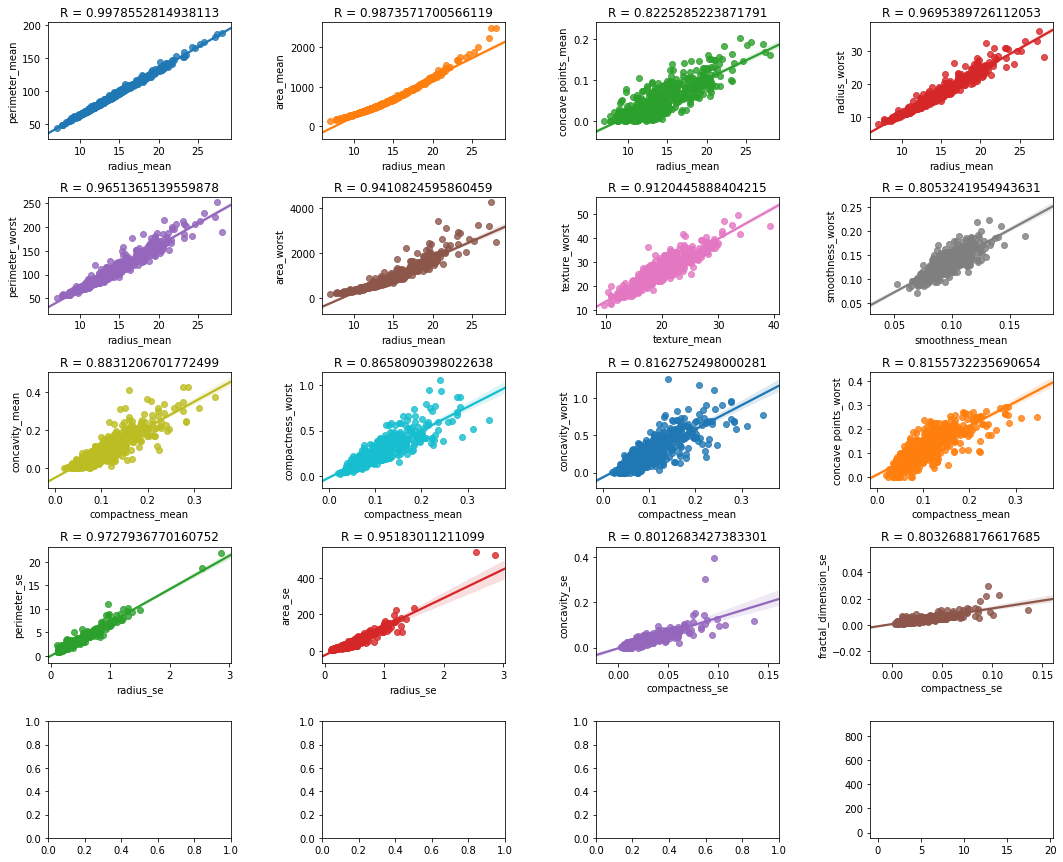

In [127]:
# Строим регрессионо-корреляционную прямую
fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (18, 15))

for idx, feat in enumerate(CorPairs):
    sns.regplot(x = feat[0], y = feat[1], data = data, ax = axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_title('R = %s' % str(feat[2]))
    axes[idx // 4, idx % 4].set_xlabel(feat[0])
    axes[idx // 4, idx % 4].set_ylabel(feat[1])
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    

### По графикам можно сказать, что у всех пар признаков с высокой корреляцией (более 0.8) видна линейная зависимость. Соответственно, чем выше значение коэффициента корреляции, тем "более линейный" график получается.
 

# 6

In [128]:
name_columns = list(data.columns)
name_columns.remove('id')
name_columns.remove('diagnosis')
len(name_columns)


30

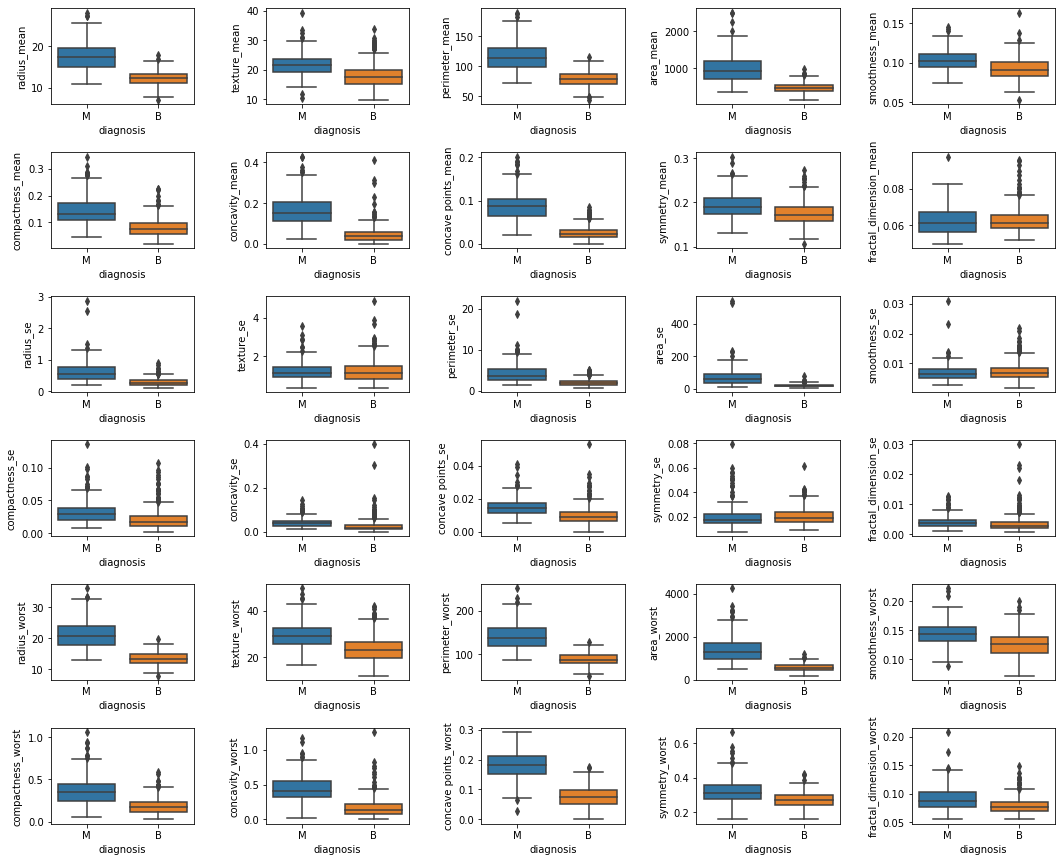

In [129]:
fig, axes = plt.subplots(nrows = 6, ncols = 5, figsize = (18, 15))

for idx, feat in enumerate(name_columns):
    sns.boxplot(x = 'diagnosis', y = feat, data = data, ax = axes[idx // 5, idx % 5])
    axes[idx // 5, idx % 5].set_xlabel('diagnosis')
    axes[idx // 5, idx % 5].set_ylabel(feat);
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    

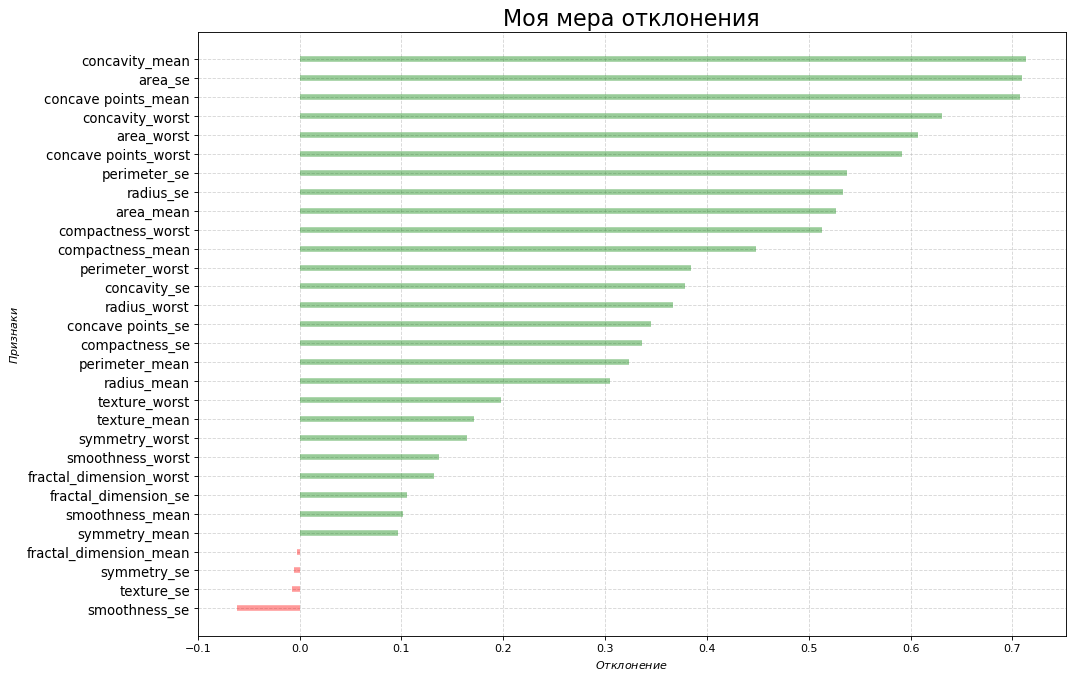

In [132]:
# 
list_std = []
for j in name_columns:
    f = data[data['diagnosis'] == 'M'][j].mean()
    d = data[data['diagnosis'] == 'B'][j].mean()
    st = (f - d) / f
    list_std.append([j, st])
df = pd.DataFrame(list_std)
df['colors'] = ['red' if x < 0 else 'green' for x in df.iloc[:, 1]]
df.sort_values(by = 1, inplace = True)
df.reset_index(inplace = True)

# 
plt.figure(figsize = (14, 10), dpi = 80)
plt.hlines(y = df[0], xmin = 0, xmax = df[1], color = df['colors'], alpha = 0.4, linewidth = 5)

# 
plt.gca().set(ylabel = '$Признаки$', xlabel = '$Отклонение$')
plt.yticks(df[0], fontsize = 12)
plt.title('Моя мера отклонения', fontdict={'size':20})
plt.grid(linestyle = '--', alpha = 0.5)
plt.show()


In [131]:
# наиболее удобно было бы отделить злокачественные новообразования от доброкачественных по признакам, 
# у которых наша мера Отклонение более, например, 0.5 по модулю:
df[abs(df[1]) > 0.5][0].tolist()


['compactness_worst',
 'area_mean',
 'radius_se',
 'perimeter_se',
 'concave points_worst',
 'area_worst',
 'concavity_worst',
 'concave points_mean',
 'area_se',
 'concavity_mean']